### Bouncing Ball
A ball is dropped from a height of $h = 30\text{ m}$ and a weight of $m = 1\text{ kg}$. Every time the ball hits the ground, $\frac{1}{4}$ of its mechanical energy goes to friction (ie $E_i = \tfrac{3}{4}E_{i-1}$ during its ith movement.

Until it hits the ground for the tenth time:
Let's plot the Position-Time graph.

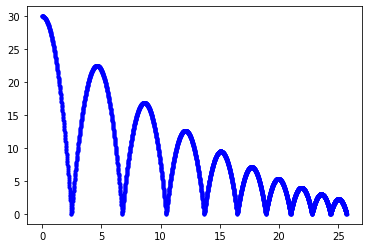

In [6]:
import numpy as np
import matplotlib.pyplot as plt

g = 9.8 # m/s^2

h = 30 # m
m = 1 # kg

E = m*g*h

# how many steps to calculate each fall/ascension time

N = 200 

def flight_time(h):
    # Calculates the time taken until an object released from height h falls at a distance of h = 0
    # h = 0.5*g*t**2 -> t = sqrt(2h/g)
    return np.sqrt(2*h/g)

def height(h,t):
    # Calculates the position of an object released from height h at time t
    # y = h - 0.5*g*t**2
    return (h - 0.5*g*t**2)

t_s = [] # time values
y_s = [] # position values

# First fall
tp = flight_time(h)
t_s_i = np.linspace(0,tp,N)
y_s_i = height(h,t_s_i)

t_s = np.concatenate([t_s,t_s_i])
y_s = np.concatenate([y_s ,y_s_i])

for i in range(9):
    h = 3/4 * h
    tp = flight_time(h)
    t_s_i = np.linspace(0,tp,N)
    y_s_i = height(h,t_s_i)
    y_s = np.concatenate([y_s,y_s_i[:0:-1],y_s_i])
    t_s = np.concatenate([t_s,t_s[-1]+t_s_i,t_s[-1]+t_s_i[-1]+t_s_i[1::]])

plt.plot(t_s,y_s,".b-")
plt.show()

Let's plot the Velocity-Time graph using the derivative of the Position-Time graph.

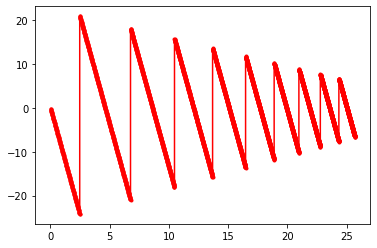

In [7]:
v_s = []
vt_s = []

for i in range(1,y_s.size-1):
    delta_t = t_s[i+1] - t_s[i-1]
    v_i = (y_s[i+1] - y_s[i-1]) / delta_t
    v_s.append(v_i)
    vt_s.append(t_s[i])

plt.plot(vt_s,v_s,".r-")
plt.show()

Let's plot the Acceleration-Time graph using the derivative of the velocity-time graph.

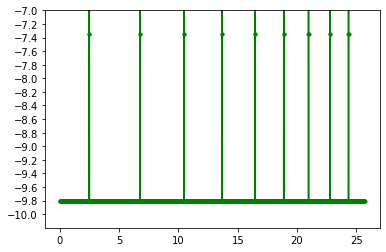

In [8]:
a_s = []
at_s = []
for i in range(1,len(v_s)-1):
    delta_t = vt_s[i+1] - vt_s[i-1]
    a_i = (v_s[i+1] - v_s[i-1]) / delta_t
    a_s.append(a_i)
    at_s.append(vt_s[i])
a_s = np.array(a_s)
at_s = np.array(at_s)

plt.plot(at_s,a_s,".g-")
plt.ylim(-10.2,-7)
plt.yticks(np.arange(-7,-10.2,-0.2))
plt.show()